In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import seaborn as sns

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.externals.six import StringIO

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_excel("/content/drive/MyDrive/Personal things (important)/voice.xlsx")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.062406,0.228241,0.135874,0.256796,0.120922,2.131880,8.048923,0.920532,0.363252,0.256546,0.203113,0.120205,0.015748,0.275862,0.396763,0.531250,1.00000,1.000000,0.187567,NaN,male
1,0.179908,0.054234,0.166930,0.144026,0.225790,0.081765,1.979066,8.342500,0.935432,0.414462,0.149077,0.179908,0.138831,0.015795,0.271186,0.428894,0.53125,4.171875,4.171875,0.080946,male
2,0.154634,0.066745,0.157478,0.120972,0.192534,0.071563,1.708275,6.527846,0.959577,0.679611,0.150177,0.154634,0.128165,0.043406,0.279114,0.360934,0.53125,4.285107,4.285107,0.067631,male
3,0.197191,0.061735,0.179982,0.140525,0.261097,0.120572,2.332840,9.071292,0.896264,0.243173,0.271248,0.197191,0.135548,0.016048,0.262295,0.471635,0.53125,3.742188,3.742188,0.115495,male
4,0.190275,0.067959,0.184533,0.142575,0.256946,0.114370,2.662875,12.302079,0.934852,0.526194,0.273199,0.190275,0.129316,0.043193,0.279114,0.445149,0.53125,3.725244,3.725244,0.071785,male


In [ ]:
voice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  660 non-null    float64
 1   sd        660 non-null    float64
 2   median    660 non-null    float64
 3   Q25       660 non-null    float64
 4   Q75       660 non-null    float64
 5   IQR       660 non-null    float64
 6   skew      660 non-null    float64
 7   kurt      660 non-null    float64
 8   sp.ent    660 non-null    float64
 9   sfm       660 non-null    float64
 10  mode      660 non-null    float64
 11  centroid  660 non-null    float64
 12  meanfun   660 non-null    float64
 13  minfun    660 non-null    float64
 14  maxfun    660 non-null    float64
 15  meandom   660 non-null    float64
 16  mindom    660 non-null    float64
 17  maxdom    660 non-null    float64
 18  dfrange   660 non-null    float64
 19  modindx   659 non-null    float64
 20  label     660 non-null    object

In [ ]:
voice['label'].value_counts()

male      442
female    218
Name: label, dtype: int64

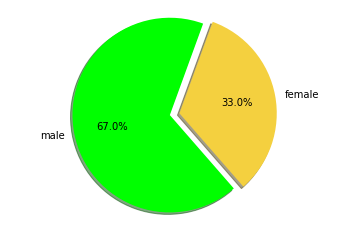

In [ ]:
labels = 'male', 'female'
sizes = [442,218]
colors = ['#00FF00','#F4D03F']
explode = (0, 0.1)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=70)

plt.axis('equal')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


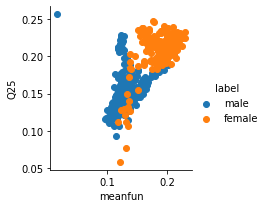

In [ ]:
# We can compare other features by simply change "meanfun" and "Q25"
sns.FacetGrid(voice, hue="label", size=3)\
   .map(plt.scatter, "meanfun","Q25")\
   .add_legend()
plt.show()

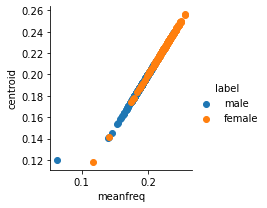

In [ ]:
# We can compare other features by simply change "Q25" and "meanfreq"
sns.FacetGrid(voice, hue="label", size=3)\
   .map(plt.scatter,"meanfreq","centroid")\
   .add_legend()
plt.show()

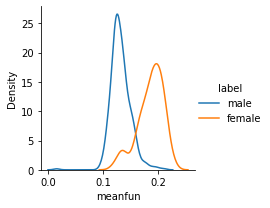

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.FacetGrid(voice, hue="label",size=3) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

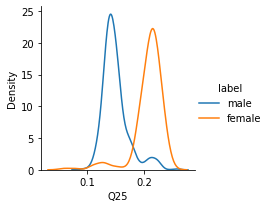

In [ ]:
# We can visualize other features by substituting Q25
sns.FacetGrid(voice, hue="label", size=3) \
   .map(sns.kdeplot, "Q25") \
   .add_legend()
plt.show()

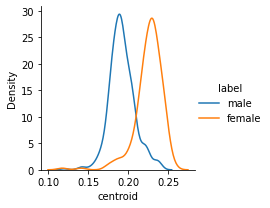

In [ ]:
# We can visualize other features by substituting centroid
sns.FacetGrid(voice, hue="label", size=3) \
   .map(sns.kdeplot,"centroid") \
   .add_legend()
plt.show()

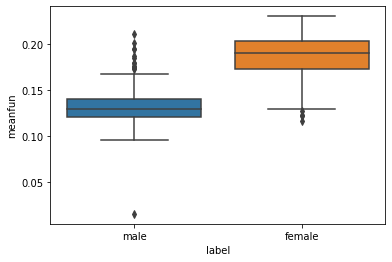

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.boxplot(x="label",y="meanfun",data=voice)
plt.show()

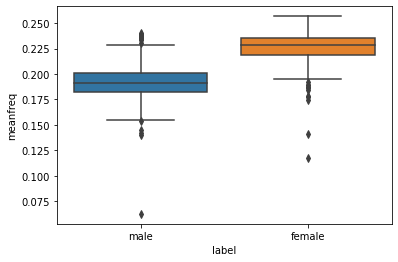

In [ ]:
# We can visualize other features by substituting "meanfreq"
sns.boxplot(x="label",y="meanfreq",data=voice)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.000000,1.000000,0.245666,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.310934,0.667430,0.017922,0.000000,1.000000,1.000000,0.382754,1.00000,0.021871,0.000000,NaN,1.0
1,0.604604,0.163054,0.428152,0.432562,0.687992,0.029681,0.155959,0.047427,0.936275,0.518092,0.433701,0.447321,0.574367,0.000593,0.473135,0.259311,0.53125,0.169864,0.182965,0.244744,1.0
2,0.474558,0.223230,0.372612,0.316558,0.469816,0.024853,0.118304,0.035831,0.975784,0.865920,0.438460,0.265544,0.524598,0.106698,0.506395,0.177350,0.53125,0.175147,0.188165,0.196347,1.0
3,0.693538,0.199134,0.504849,0.414947,0.919619,0.048048,0.205153,0.052084,0.872184,0.293391,0.962146,0.571632,0.559050,0.001567,0.435831,0.310857,0.53125,0.149815,0.163233,0.370323,1.0
4,0.657948,0.229068,0.531590,0.425264,0.892388,0.045114,0.251046,0.072730,0.935327,0.664665,0.970582,0.521884,0.529967,0.105882,0.506395,0.278915,0.53125,0.149025,0.162455,0.211448,1.0


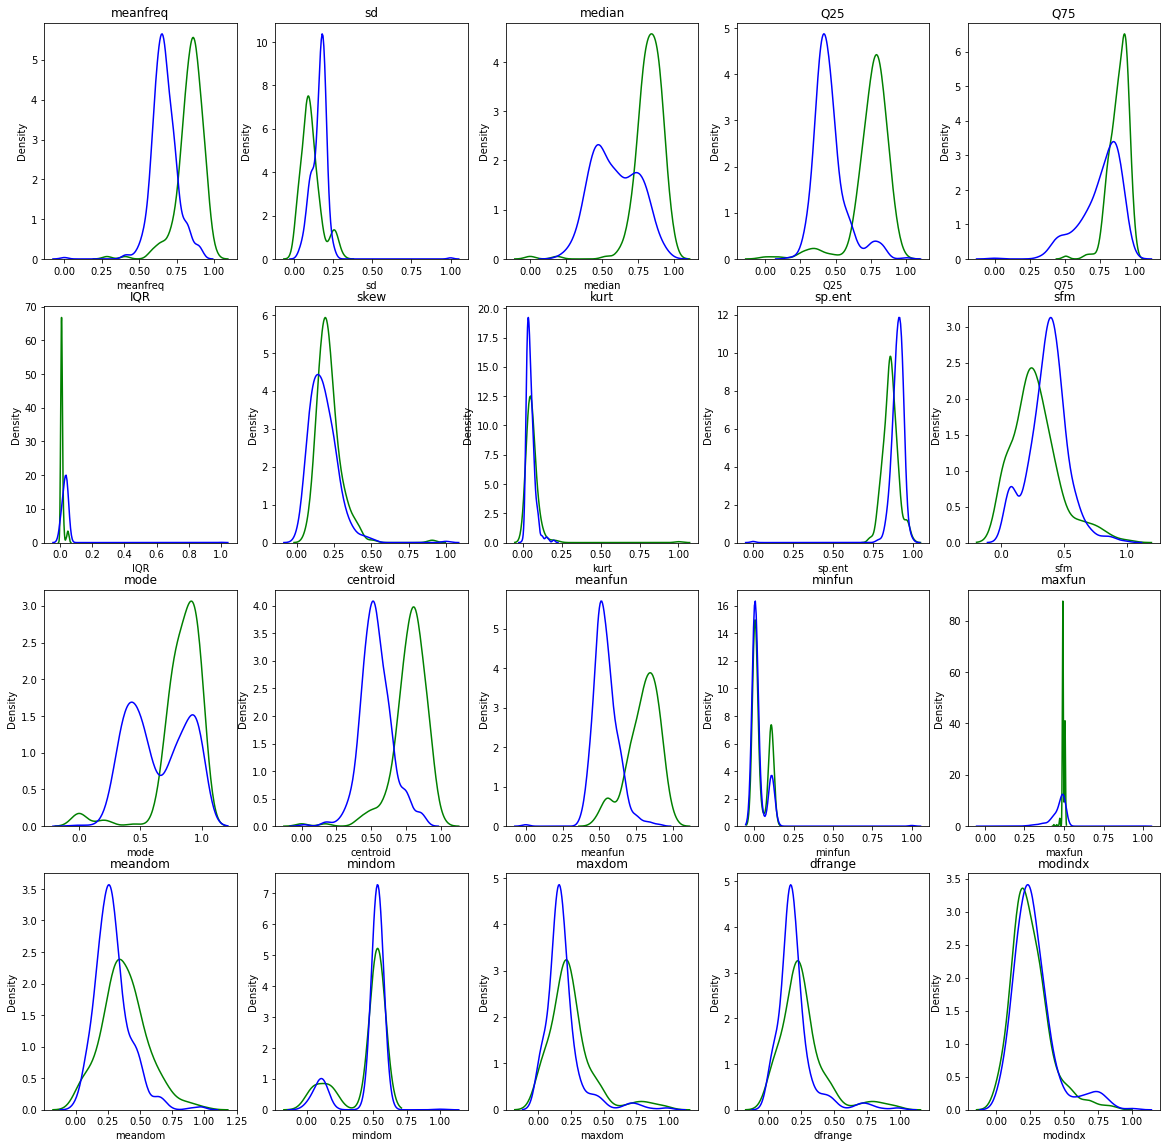

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost
from sklearn.metrics import classification_report

In [ ]:
train, test = train_test_split(voice, test_size=0.3)

In [ ]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
378,0.706914,0.249444,0.754922,0.435078,0.949803,0.048333,0.269368,0.074156,0.890047,0.464479,0.953061,0.590329,0.555732,0.120560,0.506210,0.272903,0.531250,0.144712,0.158211,0.170380,1.0
271,0.747097,0.186845,0.823979,0.412179,0.887139,0.045966,0.223929,0.061667,0.892793,0.342981,0.886221,0.646496,0.509677,0.006875,0.473135,0.218036,0.101562,0.175696,0.184042,0.152161,1.0
144,0.604401,0.139902,0.471937,0.428535,0.645013,0.026959,0.204332,0.068049,0.920813,0.471624,0.408609,0.447038,0.509108,0.120207,0.506210,0.610125,0.531250,0.679455,0.684514,0.109201,1.0
636,0.845949,0.081019,0.789891,0.762456,0.875984,0.012213,0.160548,0.041123,0.860304,0.250127,0.754488,0.784670,0.919377,0.028493,0.492752,0.246168,0.531250,0.194651,0.207361,0.147923,0.0
228,0.646222,0.191608,0.448722,0.399346,0.831365,0.043149,0.122086,0.034253,0.923008,0.460757,0.446896,0.505494,0.535124,0.006584,0.492752,0.239969,0.531250,0.161844,0.175073,0.168397,1.0


In [ ]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

# Creating a Dictionaire
model_accuracy = {}
model_accuracy_3 = {}

In [ ]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

# K-Nearest Neighbors

In [ ]:
#@title
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

In [ ]:
#@title
print(np.any(np.isnan(x_train)),np.all(np.isfinite(x_train))) #for nan error infinite not taken in colab

True False


In [ ]:
#@title
x_train = x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)  #for nan error infinite not taken in colab

Lowest error is 0.015151515151515152 occurs at k=1.


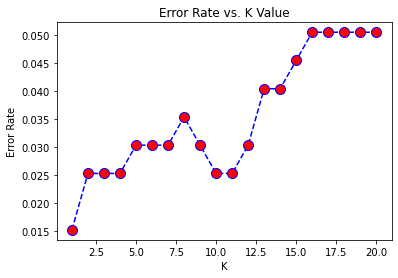

In [ ]:
#@title
k=knn_error(21,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9706    0.9851    0.9778        67
        male     0.9923    0.9847    0.9885       131

    accuracy                         0.9848       198
   macro avg     0.9814    0.9849    0.9831       198
weighted avg     0.9850    0.9848    0.9849       198



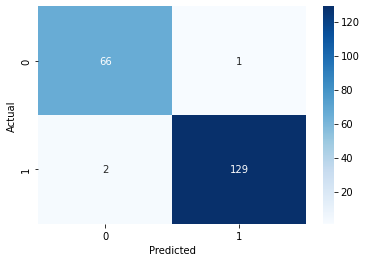

KNN: 0.9848484848484849


In [ ]:
#@title
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "KNN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['KNN'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
#@title
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97849462, 0.96774194, 0.97826087, 0.95652174, 1.        ])

In [ ]:
#@title
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)

print( "KNN Train : {}".format(model.score(x_train,y_train)))
print( "KNN Test : {}".format(model.score(x_test,y_test)))

              precision    recall  f1-score   support

      female     0.9706    0.9851    0.9778        67
        male     0.9923    0.9847    0.9885       131

    accuracy                         0.9848       198
   macro avg     0.9814    0.9849    0.9831       198
weighted avg     0.9850    0.9848    0.9849       198

KNN Train : 1.0
KNN Test : 0.9848484848484849


# Naive Bayes

              precision    recall  f1-score   support

      female     0.8267    0.9254    0.8732        67
        male     0.9593    0.9008    0.9291       131

    accuracy                         0.9091       198
   macro avg     0.8930    0.9131    0.9012       198
weighted avg     0.9145    0.9091    0.9102       198



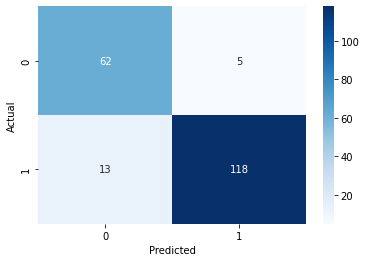

Naive Bayes: 0.9090909090909091


In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Naive Bayes: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.94623656, 0.90322581, 0.90217391, 0.88043478, 0.91304348])

# Decision Tree

In [ ]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.025252525252525252 occurs at n=4.


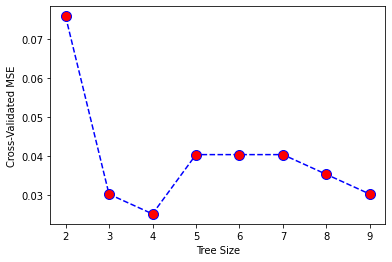

In [ ]:
n=dt_error(10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9844    0.9403    0.9618        67
        male     0.9701    0.9924    0.9811       131

    accuracy                         0.9747       198
   macro avg     0.9773    0.9663    0.9715       198
weighted avg     0.9750    0.9747    0.9746       198



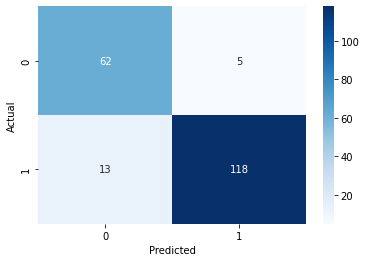

Decision Tree: 0.9090909090909091


In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Decision Tree: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Decision Tree'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.94623656, 0.90322581, 0.90217391, 0.88043478, 0.91304348])

# Random Forest

In [ ]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.025252525252525252 occurs at n=21.


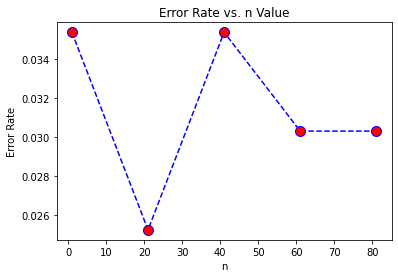

In [ ]:
e=rf_error(100,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9841    0.9254    0.9538        67
        male     0.9630    0.9924    0.9774       131

    accuracy                         0.9697       198
   macro avg     0.9735    0.9589    0.9656       198
weighted avg     0.9701    0.9697    0.9695       198



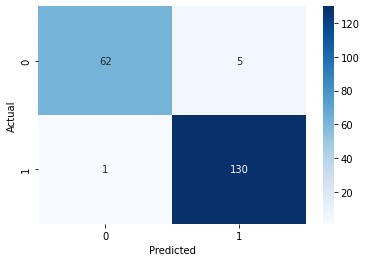

Random Forest: 0.9696969696969697


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Random Forest: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97849462, 0.98924731, 0.9673913 , 0.98913043, 0.97826087])

# XgBoost

              precision    recall  f1-score   support

      female     0.9844    0.9403    0.9618        67
        male     0.9701    0.9924    0.9811       131

    accuracy                         0.9747       198
   macro avg     0.9773    0.9663    0.9715       198
weighted avg     0.9750    0.9747    0.9746       198



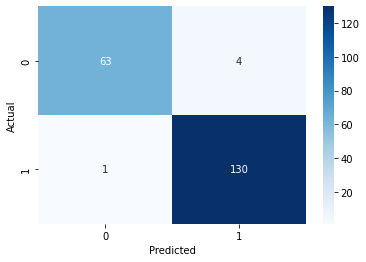

XgBoost: 0.9747474747474747


In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "XgBoost: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['XgBoost'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.96774194, 0.95698925, 0.9673913 , 1.        , 0.95652174])

# Support Vector Machine

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9805194805194806
rbf  out-of-sample accuracy in SVM:  0.9848484848484849
poly  in-sample accuracy in SVM:  0.9891774891774892
poly  out-of-sample accuracy in SVM:  0.9848484848484849
linear  in-sample accuracy in SVM:  0.974025974025974
linear  out-of-sample accuracy in SVM:  0.9797979797979798
Highest accuracy is 0.9848484848484849 occurs at rbf kernel.


Lowest error is 0.010101010101010102 occurs at C=5.


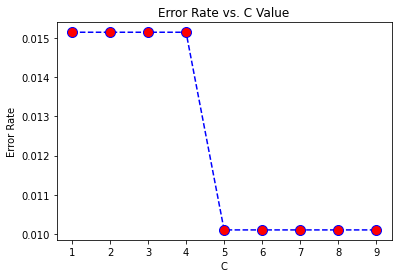

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9851    0.9851    0.9851        67
        male     0.9924    0.9924    0.9924       131

    accuracy                         0.9899       198
   macro avg     0.9887    0.9887    0.9887       198
weighted avg     0.9899    0.9899    0.9899       198



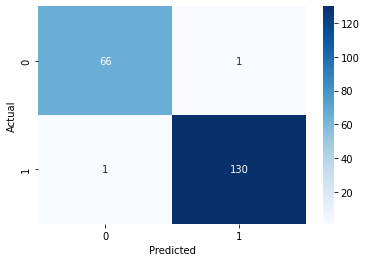

SVM: 0.98989898989899


In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "SVM: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['SVM'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.98924731, 0.97849462, 0.9673913 , 0.9673913 , 0.98913043])

# Neural Network

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.020202020202020204 occurs at C=9.


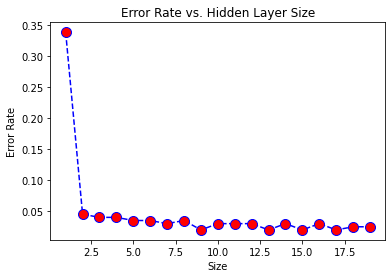

In [ ]:
h=nn_error(20,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9701    0.9701    0.9701        67
        male     0.9847    0.9847    0.9847       131

    accuracy                         0.9798       198
   macro avg     0.9774    0.9774    0.9774       198
weighted avg     0.9798    0.9798    0.9798       198



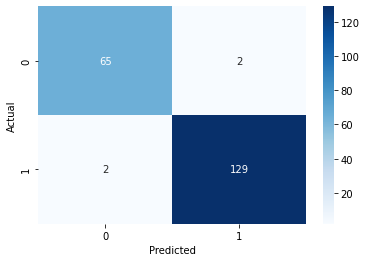

NN: 0.9797979797979798


In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "NN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['NN'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97849462, 0.97849462, 0.95652174, 0.94565217, 0.98913043])

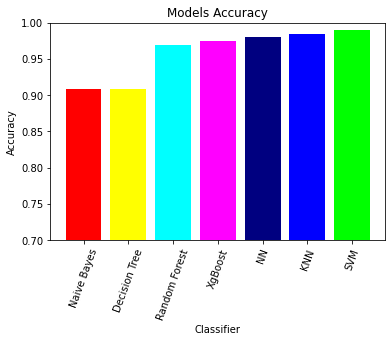

In [ ]:
#Models Accuracy
from collections import OrderedDict
model_accuracy = OrderedDict(sorted(model_accuracy.items(), key=lambda t: t[1]))
plt.bar(range(len(model_accuracy)), model_accuracy.values(),align='center', color=['#FF0000', '#FFFF00', '#00FFFF', '#FF00FF', '#000080', '#0000FF', '#00FF00'])
plt.xticks(range(len(model_accuracy)), model_accuracy.keys(), rotation =70)
axes = plt.gca()
axes.set_ylim([.7,1.0])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Models Accuracy")
plt.show()

# Feature Importances

In [ ]:
X = voice.iloc[:, : -1].values

y = voice.iloc[:, 20].values

In [ ]:
#Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(x_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Calculating the Performance of Random Forest Classification
from sklearn import metrics
print( "Accuracy of Random Forest Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) )

Accuracy of Random Forest Classification: 0.9747474747474747


In [ ]:
#Feature Importances
header = list(voice)

classifier.fit(x_train, y_train)
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

#Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature meanfun (0.218660)
2. Feature Q25 (0.151038)
3. Feature centroid (0.103814)
4. Feature meanfreq (0.096991)
5. Feature median (0.056187)
6. Feature IQR (0.055986)
7. Feature sd (0.055021)
8. Feature maxfun (0.037648)
9. Feature mode (0.036344)
10. Feature Q75 (0.031284)
11. Feature sfm (0.031269)
12. Feature sp.ent (0.027272)
13. Feature minfun (0.020139)
14. Feature meandom (0.016807)
15. Feature mindom (0.015870)
16. Feature kurt (0.011470)
17. Feature maxdom (0.009990)
18. Feature modindx (0.008875)
19. Feature dfrange (0.008129)
20. Feature skew (0.007207)


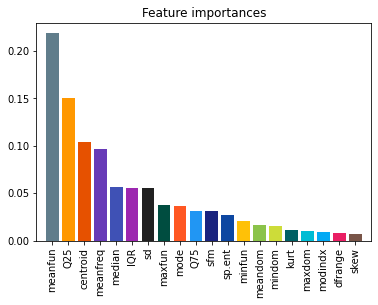

In [ ]:
# Plot the feature importances of the forest with Material Design
import random
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#3F51B5', '#2196F3',
          '#03A9F4' ,'#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B',
          '#FFC107', '#FF9800', '#FF5722', '#795548', '#607D8B', '#B71C1C', '#880E4F',
          '#4A148C', '#311B92', '#1A237E', '#0D47A1', '#01579B', '#006064', '#004D40',
          '#1B5E20', '#33691E', '#827717', '#F57F17', '#FF6F00', '#E65100', '#BF360C',
          '#3E2723', '#212121', '#607D8B']

random_colors = random.sample(colors, 20)

plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=random_colors, align="center")
plt.xticks(range(X.shape[1]),header1, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
x_train3 = train[["meanfun","Q25","meanfreq","centroid"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","Q25","meanfreq","centroid"]]
y_test3 = test["label"]

# KNN

Lowest error is 0.04040404040404041 occurs at k=3.


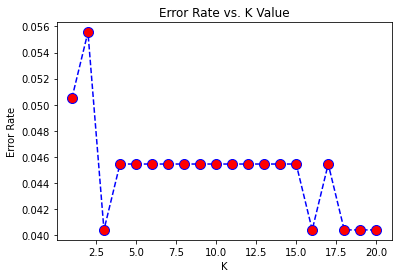

In [ ]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9836    0.8955    0.9375        67
        male     0.9489    0.9924    0.9701       131

    accuracy                         0.9596       198
   macro avg     0.9663    0.9439    0.9538       198
weighted avg     0.9606    0.9596    0.9591       198



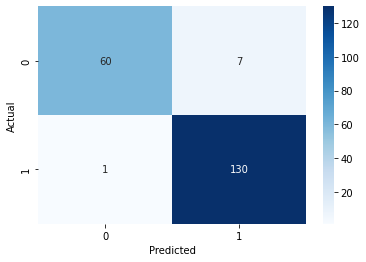

KNN_4: 0.9595959595959596


In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "KNN_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['KNN_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.97849462, 0.95698925, 0.95652174, 0.95652174, 0.94565217])

# Naive Bayes

              precision    recall  f1-score   support

      female     0.8611    0.9254    0.8921        67
        male     0.9603    0.9237    0.9416       131

    accuracy                         0.9242       198
   macro avg     0.9107    0.9245    0.9169       198
weighted avg     0.9267    0.9242    0.9249       198



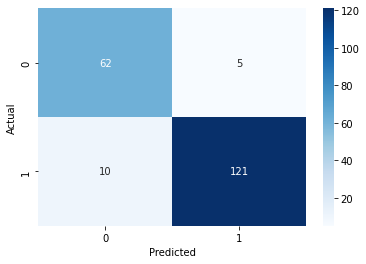

Naive Bayes_4: 0.9242424242424242


In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Naive Bayes_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Naive Bayes_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.95698925, 0.91397849, 0.91304348, 0.91304348, 0.91304348])

# Decision Tree

Lowest error is 0.025252525252525252 occurs at n=4.


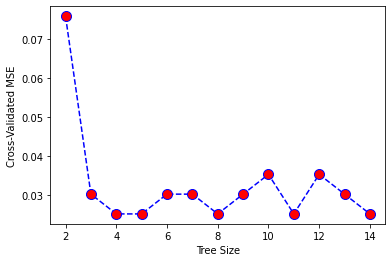

In [ ]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9844    0.9403    0.9618        67
        male     0.9701    0.9924    0.9811       131

    accuracy                         0.9747       198
   macro avg     0.9773    0.9663    0.9715       198
weighted avg     0.9750    0.9747    0.9746       198



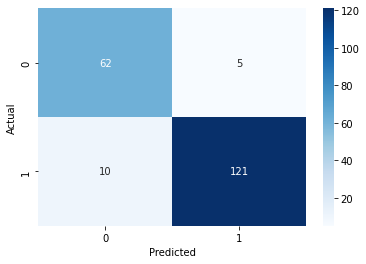

Decision Tree_4: 0.9242424242424242


In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Decision Tree_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Decision Tree_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.95698925, 0.91397849, 0.91304348, 0.91304348, 0.91304348])

# Random Forest

Lowest error is 0.03535353535353535 occurs at n=21.


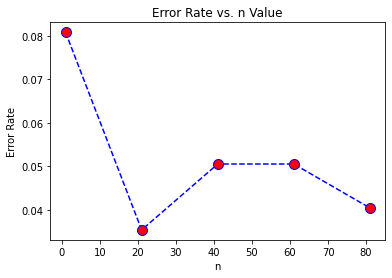

In [ ]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9831    0.8657    0.9206        67
        male     0.9353    0.9924    0.9630       131

    accuracy                         0.9495       198
   macro avg     0.9592    0.9290    0.9418       198
weighted avg     0.9514    0.9495    0.9486       198



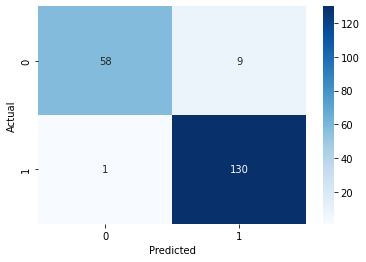

Random Forest_4: 0.9494949494949495


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Random Forest_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Random Forest_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.96774194, 0.97849462, 0.9673913 , 0.95652174, 0.94565217])

# XgBoost

              precision    recall  f1-score   support

      female     0.9844    0.9403    0.9618        67
        male     0.9701    0.9924    0.9811       131

    accuracy                         0.9747       198
   macro avg     0.9773    0.9663    0.9715       198
weighted avg     0.9750    0.9747    0.9746       198



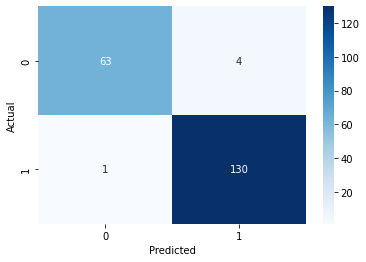

XgBoost_4: 0.9747474747474747


In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "XgBoost_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['XgBoost_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.98924731, 0.95698925, 0.95652174, 0.95652174, 0.94565217])

# Support Vector Machine

In [ ]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9632034632034632
rbf  out-of-sample accuracy in SVM:  0.9545454545454546
poly  in-sample accuracy in SVM:  0.974025974025974
poly  out-of-sample accuracy in SVM:  0.9646464646464646
linear  in-sample accuracy in SVM:  0.9523809523809523
linear  out-of-sample accuracy in SVM:  0.9444444444444444
Highest accuracy is 0.9646464646464646 occurs at poly kernel.


Lowest error is 0.03535353535353535 occurs at C=1.


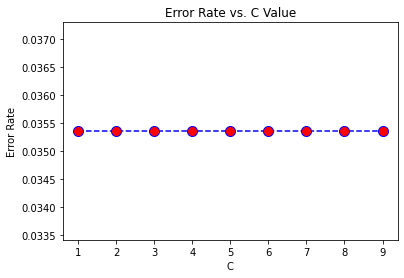

In [ ]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9839    0.9104    0.9457        67
        male     0.9559    0.9924    0.9738       131

    accuracy                         0.9646       198
   macro avg     0.9699    0.9514    0.9598       198
weighted avg     0.9654    0.9646    0.9643       198



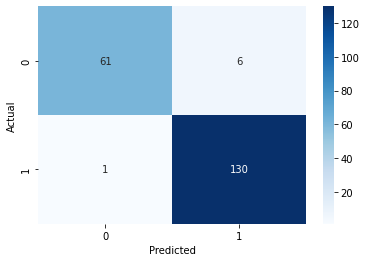

SVM_4: 0.9646464646464646


In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "SVM_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['SVM_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.98924731, 0.97849462, 0.95652174, 0.95652174, 0.95652174])

# Neural Network

Lowest error is 0.06060606060606061 occurs at C=5.


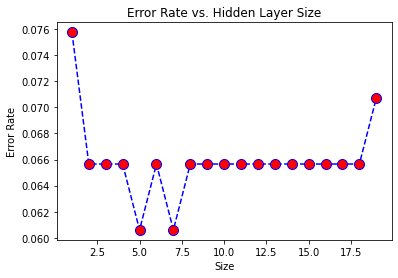

In [ ]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9365    0.8806    0.9077        67
        male     0.9407    0.9695    0.9549       131

    accuracy                         0.9394       198
   macro avg     0.9386    0.9250    0.9313       198
weighted avg     0.9393    0.9394    0.9389       198



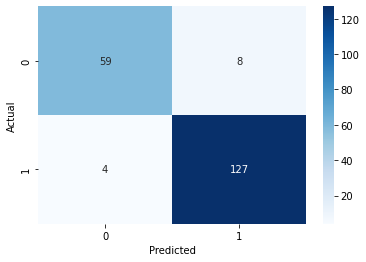

NN_4: 0.9393939393939394


In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "NN_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['NN_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.67741935, 0.66666667, 0.67391304, 0.67391304, 0.67391304])